In [3]:
import os
os.chdir('..')

In [4]:
import torch
import numpy as np

from instance_generator import sample_instances
from gnn_library.util import train, save, load, gen_train_input
from evaluate import evaluate_model
from params import *
from util import upload_meta_experiment, load_meta_experiments, \
    graph_config_to_string, _plot_meta_ratios

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:7' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 2.0.0+cu117
Using device: cuda:7


## Train meta-GNN

In [5]:
GNN1, args1 = load('GNN1_hyperparam_tuned', device)
GNN2, args2 = load('GNN2_hyperparam_tuned', device)

In [7]:
args = {
    'processor':         'DeeperGCN',
    'head':              'meta',
    'num_layers':        4,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        6,
    'node_feature_dim':  7,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        8,
    'output_dim':        2,
    'head_mlp_dim':      8,
    'dropout':           0,
    'epochs':            35,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.001,
    'device':            device
}

train_loader, val_loader = gen_train_input(META_TRAIN_CONFIG, args, seed=0, base_models=[GNN1, GNN2])
_, _, _, META_GNN, _ = train(train_loader, val_loader, args)
save(META_GNN, args, 'META_GNN')


/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)
Training:   0%|          | 0/35 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.6671765706972436


Training:   3%|▎         | 1/35 [00:09<05:32,  9.77s/Epochs]

TEST LOSS: 0.6551742553710938
TEST ACCURACY: 0.0


Training:   6%|▌         | 2/35 [00:18<05:04,  9.22s/Epochs]

TRAINING LOSS: 0.6329981046104068


Training:   9%|▊         | 3/35 [00:30<05:27, 10.24s/Epochs]

TRAINING LOSS: 0.6203738851960107


Training:  11%|█▏        | 4/35 [00:37<04:45,  9.20s/Epochs]

TRAINING LOSS: 0.6066914973771651
TRAINING LOSS: 0.6020865695290516


Training:  14%|█▍        | 5/35 [00:47<04:39,  9.31s/Epochs]

TEST LOSS: 0.6235002279281616
TEST ACCURACY: 0.0


Training:  17%|█▋        | 6/35 [00:54<04:14,  8.79s/Epochs]

TRAINING LOSS: 0.6000231738945737


Training:  20%|██        | 7/35 [01:02<03:57,  8.47s/Epochs]

TRAINING LOSS: 0.5957571111555671


Training:  23%|██▎       | 8/35 [01:10<03:39,  8.11s/Epochs]

TRAINING LOSS: 0.5933999324502772
TRAINING LOSS: 0.5914544706453492


Training:  26%|██▌       | 9/35 [01:18<03:36,  8.32s/Epochs]

TEST LOSS: 0.6127819418907166
TEST ACCURACY: 0.0


Training:  29%|██▊       | 10/35 [01:25<03:17,  7.90s/Epochs]

TRAINING LOSS: 0.5945386616929614


Training:  31%|███▏      | 11/35 [01:32<03:03,  7.66s/Epochs]

TRAINING LOSS: 0.5899899988997901


Training:  34%|███▍      | 12/35 [01:39<02:50,  7.39s/Epochs]

TRAINING LOSS: 0.5895394592711632
TRAINING LOSS: 0.589161575436025


Training:  37%|███▋      | 13/35 [01:49<02:55,  7.99s/Epochs]

TEST LOSS: 0.6059763431549072
TEST ACCURACY: 0.0


Training:  40%|████      | 14/35 [01:56<02:44,  7.84s/Epochs]

TRAINING LOSS: 0.5888852705340744


Training:  43%|████▎     | 15/35 [02:03<02:30,  7.55s/Epochs]

TRAINING LOSS: 0.5877653003646349


Training:  46%|████▌     | 16/35 [02:10<02:21,  7.47s/Epochs]

TRAINING LOSS: 0.5895170757137629
TRAINING LOSS: 0.588938361911066


Training:  49%|████▊     | 17/35 [02:19<02:22,  7.89s/Epochs]

TEST LOSS: 0.6065979599952698
TEST ACCURACY: 0.0


Training:  51%|█████▏    | 18/35 [02:26<02:09,  7.64s/Epochs]

TRAINING LOSS: 0.5883350979703365


Training:  54%|█████▍    | 19/35 [02:33<01:58,  7.40s/Epochs]

TRAINING LOSS: 0.5877979188788856


Training:  57%|█████▋    | 20/35 [02:40<01:47,  7.15s/Epochs]

TRAINING LOSS: 0.5880598105157023
TRAINING LOSS: 0.588713506479472


Training:  60%|██████    | 21/35 [02:48<01:43,  7.43s/Epochs]

TEST LOSS: 0.6043715476989746
TEST ACCURACY: 0.0


Training:  63%|██████▎   | 22/35 [03:02<02:05,  9.62s/Epochs]

TRAINING LOSS: 0.5837831800036154


Training:  66%|██████▌   | 23/35 [03:12<01:54,  9.54s/Epochs]

TRAINING LOSS: 0.5872928359812493


Training:  69%|██████▊   | 24/35 [03:19<01:35,  8.71s/Epochs]

TRAINING LOSS: 0.5858388821586442
TRAINING LOSS: 0.585973441147101


Training:  71%|███████▏  | 25/35 [03:27<01:27,  8.72s/Epochs]

TEST LOSS: 0.6036402583122253
TEST ACCURACY: 0.0


Training:  74%|███████▍  | 26/35 [03:33<01:11,  7.96s/Epochs]

TRAINING LOSS: 0.5878112540995927


Training:  77%|███████▋  | 27/35 [03:40<00:59,  7.46s/Epochs]

TRAINING LOSS: 0.5871239913632822


Training:  80%|████████  | 28/35 [03:46<00:50,  7.21s/Epochs]

TRAINING LOSS: 0.5889284781452364
TRAINING LOSS: 0.5885822430153782


Training:  83%|████████▎ | 29/35 [03:55<00:45,  7.50s/Epochs]

TEST LOSS: 0.6036765575408936
TEST ACCURACY: 0.0


Training:  86%|████████▌ | 30/35 [04:01<00:35,  7.19s/Epochs]

TRAINING LOSS: 0.5852326969664853


Training:  89%|████████▊ | 31/35 [04:07<00:27,  6.91s/Epochs]

TRAINING LOSS: 0.5859284906813805


Training:  91%|█████████▏| 32/35 [04:14<00:20,  6.73s/Epochs]

TRAINING LOSS: 0.5861856753376979
TRAINING LOSS: 0.5844238752075652


Training:  94%|█████████▍| 33/35 [04:21<00:14,  7.06s/Epochs]

TEST LOSS: 0.6026297211647034
TEST ACCURACY: 0.0


Training:  97%|█████████▋| 34/35 [04:28<00:06,  6.85s/Epochs]

TRAINING LOSS: 0.5857629666546206


Training: 100%|██████████| 35/35 [04:34<00:00,  7.85s/Epochs]

TRAINING LOSS: 0.5828041014333321


## Regime generalization experiment

#### Compute meta-GNN CRs over all graph configurations and node ratio regimes

In [9]:
META_GNN, args = load('META_GNN', device)

In [13]:
seed = 0
rng = np.random.default_rng(seed)
num_trials = 20
batch_size = 100
graph_configs = ALL_TESTING_GRAPH_CONFIGS
node_configs = EXPERIMENT_META_REGIMES
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {'rng': rng},
    'naor_lp_rounding': {'rng': rng},
    'pollner_lp_rounding': {'rng': rng}
}

regimes = [x/y for (x,y) in node_configs]

def _init_data():
    return {
        "num_trials": num_trials,
        "meta_gnn": [],
        "greedy": [],
        "greedy_t": [],
        "lp_rounding": [],
        "naor_lp_rounding": [],
        "pollner_lp_rounding": [],
        "meta_threshold": []
    }

for graph_config in graph_configs:
    data = _init_data()
    graph_str = graph_config_to_string(graph_config)

    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        instances = sample_instances(
            *node_config,
            num_trials,
            rng,
            args.__dict__,
            **graph_config
        )

        rng = np.random.default_rng(seed)
        crs, _ = evaluate_model(
            meta_model=META_GNN,
            meta_model_type='gnn',
            base_models=[GNN1, GNN2],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5,
            baselines=['greedy', 'greedy_t', 'lp_rounding'],
            **baselines_kwargs
        )
        
        # rng = np.random.default_rng(seed)
        # threshold_crs, _ = evaluate_model(
        #     meta_model=None,
        #     meta_model_type='threshold',
        #     base_models=[GNN1, GNN2],
        #     instances=instances,
        #     batch_size=batch_size,
        #     rng=rng,
        #     num_realizations=5
        # )

        data['meta_gnn'].append(crs['learned'])
        data['greedy'].append(crs['greedy'])
        data['greedy_t'].append(crs['greedy_t'])
        data['lp_rounding'].append(crs['lp_rounding'])
        # data['naor_lp_rounding'].append(crs['naor_lp_rounding'])
        # data['pollner_lp_rounding'].append(crs['pollner_lp_rounding'])
        # data['meta_threshold'].append(threshold_crs['learned'])
    
    upload_meta_experiment(graph_str, data)

{'graph_type': 'ER', 'p': 0.25, 'weighted': True, 'weight_scaling': 1} (8, 16)
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "

/home/wikum/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


Generation time: 0.21852541156113148
GNN time: 5.220927741378546
        Model assignment time: 3.1710551930591464
        State update time: {'init': 0.0074927182868123055, 'gnn state update': 1.0225772950798273, 'state only': 0.012903853319585323, 'pyg only': 1.9829782294109464, 'state update': 0.9951417911797762, 'total': 2.048713590949774}
Baseline times: {'lp_solve': 4.5934359254315495, 'greedy': 0.019151044078171253, 'greedy_t': 0.017109284177422523, 'lp_rounding': 0.07245453912764788}
Total time: 10.152758711017668
{'graph_type': 'ER', 'p': 0.25, 'weighted': True, 'weight_scaling': 1} (64, 16)
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "so

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/wikum/GNN-OBM/torch_converter.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

In [ ]:
for key in data.keys():
    if key != 'num_trials' and key != 'meta_threshold':
        print(key, np.mean(data[key]))

#### Generate regime generalization plots

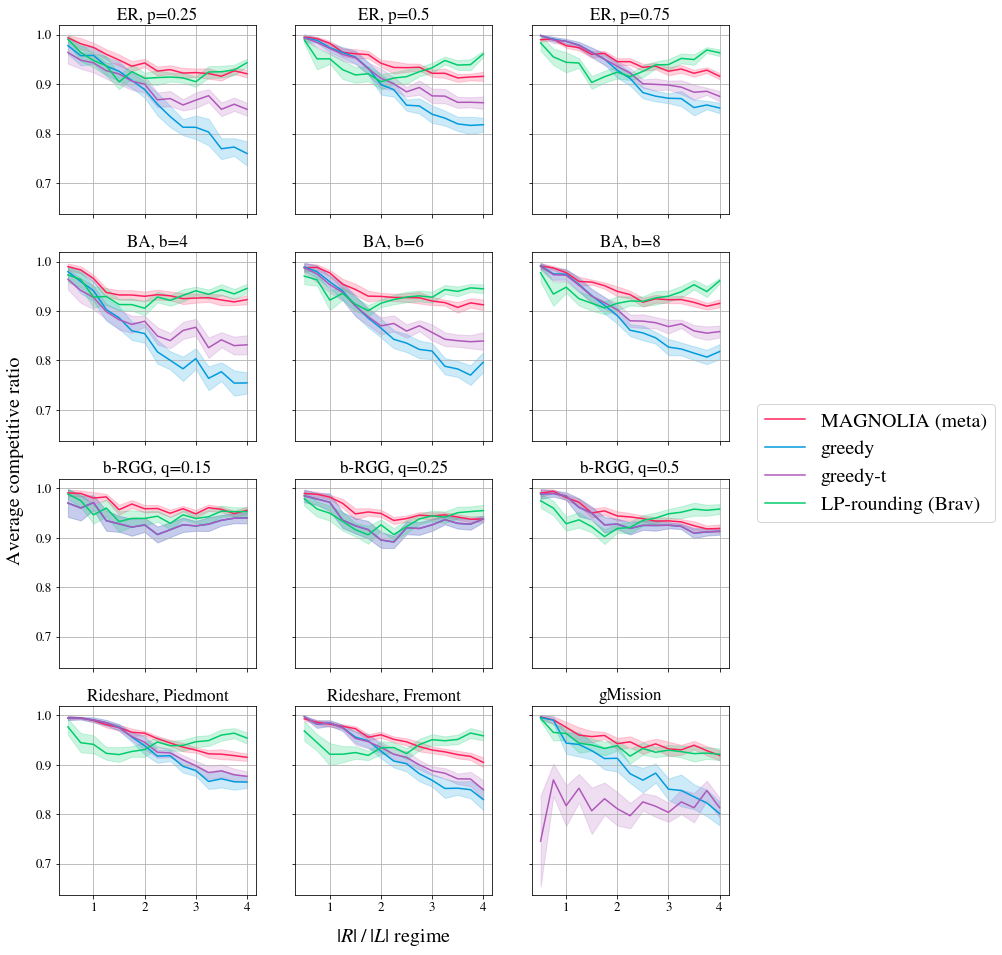

In [14]:
results = load_meta_experiments(ALL_TESTING_GRAPH_CONFIGS)
_plot_meta_ratios(
    regimes,
    results,
    ['meta_gnn', 'greedy', 'greedy_t', 'lp_rounding'],
    lambda graph_type: graph_type,
    confidence = 0.95
)

In [ ]:
data = load_meta_experiments(graph_configs)